In [103]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from Stones import StoneLocations, StoneData
from MVP import HouseDetect

(-0.5, 176.5, 306.5, -0.5)

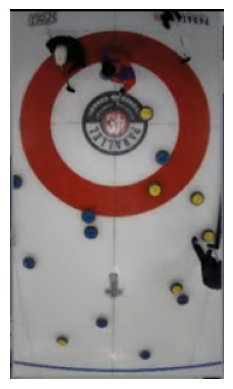

In [104]:
img_file = "data/skip-detect2.png"
envs = "data/env_variables.json"

House = HouseDetect(env_variables_file=envs)
img = cv2.cvtColor(
    cv2.imread(img_file),
    cv2.COLOR_BGR2RGB
)
plt.imshow(img); plt.axis('off')

In [105]:
print(f"Stone Color Options: {[i for i in House.stone_color_options]}")

color = "blue"
stone_data = House.stone_color_options[color]

Stone Color Options: ['red', 'yellow', 'blue']


Text(0.5, 1.0, 'Gray Stones')

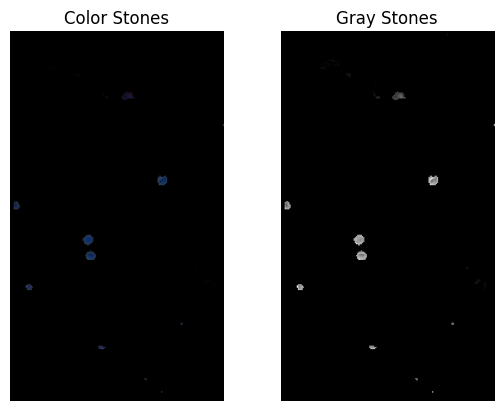

In [106]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower = np.array(stone_data.bottom_range, dtype=np.uint8)
upper = np.array(stone_data.top_range, dtype=np.uint8)
mask = cv2.inRange(hsv, lower, upper)
stones = cv2.bitwise_and(img, img, mask = mask)

plt.subplot(121)
plt.imshow(stones); plt.axis('off')
plt.title("Color Stones")

plt.subplot(122)
stones = cv2.cvtColor(stones, cv2.COLOR_RGB2GRAY)
plt.imshow(stones, cmap = "gray"); plt.axis('off')
plt.title(f'Gray Stones')

Text(0.5, 1.0, 'Thresholded')

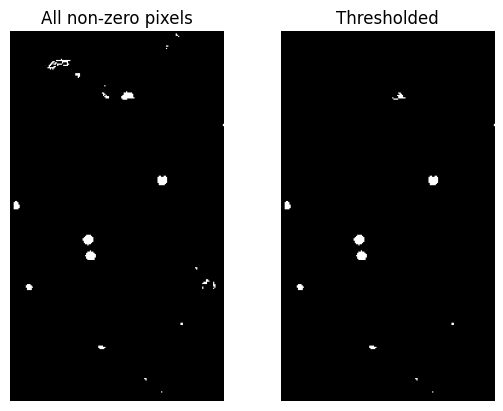

In [107]:
show_all = np.where(stones > 0, 255, 0)

_, thresh = cv2.threshold(stones, 20, 255, cv2.THRESH_BINARY)
_, thresh = cv2.threshold(thresh, 60, 255, cv2.THRESH_TRUNC)

plt.subplot(121)
plt.imshow(show_all, cmap='gray'); plt.axis('off')
plt.title("All non-zero pixels")

plt.subplot(122)
plt.imshow(thresh, cmap='gray'); plt.axis('off')
plt.title("Thresholded")

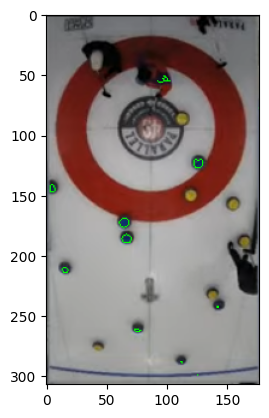

In [108]:
contours, hierarchy = cv2.findContours(thresh.astype(np.uint8), 1, 1)

cont_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0))

plt.imshow(cont_img)

In [109]:
centers = []
for contour in contours:
    hull = cv2.convexHull(contour)
    area = cv2.contourArea(hull)
    if area > House._variables.stones.min_area and len(hull) > 5:
        try:
            ellipse = cv2.fitEllipse(hull)
        except Exception as e:
            print()

        if np.diff(ellipse[1]) < House._variables.stones.axis_tolerance:
            centers.append(ellipse[0])

stones = StoneLocations(np.array(centers).astype(np.int64), **vars(stone_data))
print(stones)

Stone(numStones=3, color=blue)
